In [152]:
import numpy as np
import seaborn as sns
%matplotlib inline
import os
import pandas as pd
from scipy import interpolate
from earm.lopez_embedded import model
from pysb.bng import generate_equations
from pysb.integrate import Solver

In [2]:
os.chdir('/Users/Erin/git/')

In [3]:
earm_path = '/Users/Erin/git/earm'
data_path = os.path.join(earm_path, 'xpdata', 'forfits',
                         'EC-RP_IMS-RP_IC-RP_data_for_models.csv')
exp_data = np.genfromtxt(data_path, delimiter=',', names=True)

In [151]:
generate_equations(model)

In [153]:
t = exp_data['Time'][::10]

In [154]:
solver = Solver(model, t)
solver.run()

In [157]:
bid_sim_nocal = solver.yobs['mBid']

In [160]:
bid_sim_nocal_norm = (bid_sim_nocal - np.min(bid_sim_nocal))/np.ptp(bid_sim_nocal)

In [161]:
bid_sim_nocal_norm

array([ 0.        ,  0.00766118,  0.07673962,  0.89964803,  0.99999056,
        0.99999764,  0.99999953,  0.99999992,  0.99999999,  1.        ,
        1.        ,  1.        ])

In [4]:
fitting_params = np.load('earm_1000_fitting_vectors.npy')

In [5]:
bid_sims = np.load('/Users/Erin/git/moo_and_mcmc/earm/earm_1000_fitting_vectors_mBid.npy')
parp_sims = np.load('/Users/Erin/git/moo_and_mcmc/earm/earm_1000_fitting_vectors_cPARP.npy')
momp_sims = np.load('/Users/Erin/git/moo_and_mcmc/earm/earm_1000_fitting_vectors_MOMP.npy')

In [6]:
bid_sims_nonan = [sim for sim in bid_sims if not np.any(np.isnan(sim))]

In [7]:
bid_env = np.mean(bid_sims_nonan, axis=0) + np.random.random((1000,len(bid_sims_nonan[0])))*.50*np.mean(bid_sims_nonan, axis=0)

In [8]:
bid_env = np.random.multivariate_normal(np.mean(bid_sims_nonan, axis=0), np.identity(len(bid_sims_nonan[0]))*100, 10000)

In [10]:
bid_data = exp_data['norm_ICRP']

In [11]:
bid_data_env = np.random.multivariate_normal(bid_data, np.identity(len(bid_data))*100, 10000)

In [104]:
f = interpolate.interp1d(exp_data['Time'], exp_data['norm_ICRP'])

In [98]:
bid_data_inter = f(exp_data['Time'][::10]) + np.random.randn(10000, len(f(exp_data['Time'][::10])))*.1

In [143]:
data = f(exp_data['Time'][::10])

In [144]:
data_edg = np.copy(data)

In [145]:
data_edg[:6] += .1

In [146]:
data_edg[6:] -= .1

In [147]:
data_edg

array([ 0.1   ,  0.1   ,  0.1   ,  0.155 ,  0.2779,  0.4789,  0.7734,
        0.9   ,  0.9   ,  0.9   ,  0.9   ,  0.9   ])

In [148]:
all_data = np.vstack((data, data_edg))

In [139]:
np.min(np.vstack((data, data_edg)), axis=0)

array([ 0.    ,  0.    ,  0.    ,  0.055 ,  0.1779,  0.3789,  0.6734,
        0.8   ,  0.8   ,  0.8   ,  0.8   ,  0.8   ])

In [100]:
bid_data_norm = [(bid_data_inter[i] - np.min(bid_data_inter[i]))/np.ptp(bid_data_inter[i]) for i in range(len(bid_data_inter))]

In [101]:
bid_data_norm

[array([ 0.35664517,  0.05943017,  0.        ,  0.20975521,  0.29095394,
         0.44198125,  0.78884873,  0.93632538,  0.88448551,  1.        ,
         0.9842788 ,  0.98919962]),
 array([ 0.21601402,  0.        ,  0.17117296,  0.32186972,  0.41034693,
         0.54063867,  0.87947836,  0.7950635 ,  1.        ,  0.9168939 ,
         0.94245599,  0.84542484]),
 array([ 0.        ,  0.23262584,  0.22739565,  0.03385201,  0.26535051,
         0.48246989,  0.6781444 ,  1.        ,  0.94383234,  0.84243696,
         0.73299366,  0.56245523]),
 array([ 0.        ,  0.07295086,  0.13168801,  0.00501705,  0.42795311,
         0.41259847,  0.35043788,  0.9738427 ,  0.81989455,  0.78856349,
         1.        ,  0.72192469]),
 array([ 0.        ,  0.61195874,  0.07105667,  0.11990454,  0.32656976,
         0.28840399,  0.68311078,  0.99549754,  0.84579792,  0.93551917,
         0.9521172 ,  1.        ]),
 array([ 0.34215376,  0.13382657,  0.29154419,  0.        ,  0.29539086,
         0.557944

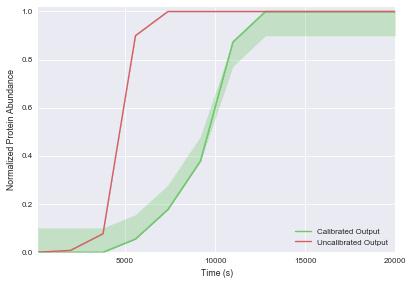

In [175]:
sns.set_context(context='paper')
cols = sns.color_palette('muted', n_colors=3)
ax = sns.tsplot(f(exp_data['Time'][::10]), time=exp_data['Time'][::10], ci=[68, 100], color=cols[1], condition='Calibrated Output')
ax.fill_between(exp_data['Time'][::10], np.min(all_data, axis=0), np.max(all_data, axis=0), alpha=.3, color=cols[1])
sns.tsplot(bid_sim_nocal_norm, time=exp_data['Time'][::10], color=cols[2], condition='Uncalibrated Output')
sns.axlabel('Time (s)', 'Normalized Protein Abundance')
ax.set_ylim(0, 1.02)
ax.legend(loc='best')
#ax.set_title('Model Simulations After Calibration')

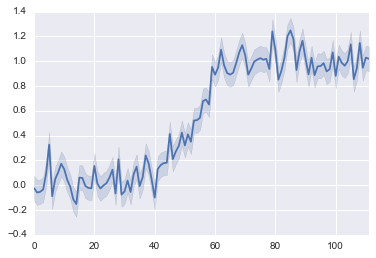

In [89]:
sns.tsplot(bid_env)

In [15]:
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)

In [20]:
bid_sims

array([[  0.00000000e+00,   3.27120174e-08,              nan, ...,
                     nan,              nan,              nan],
       [  0.00000000e+00,   5.18803511e-08,   1.09876273e-06, ...,
          9.99993689e-01,   9.99993690e-01,   9.99993691e-01],
       [  0.00000000e+00,   7.38022109e-09,   2.40672714e-07, ...,
          9.98675057e-01,   9.98675057e-01,   9.98675058e-01],
       ..., 
       [  0.00000000e+00,   3.70438287e-07,   5.15602499e-06, ...,
          9.97261845e-01,   9.97262775e-01,   9.97263704e-01],
       [  0.00000000e+00,   1.43733995e-08,   3.82994779e-07, ...,
          9.98818232e-01,   9.98818556e-01,   9.98818880e-01],
       [  0.00000000e+00,   2.19075155e-07,   2.91617710e-06, ...,
          9.98150221e-01,   9.98141477e-01,   9.98133095e-01]])